<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/TestKidneys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##🗂️Import data: Lab

In [2]:
import pandas as pd
lab = pd.read_csv('/content/drive/MyDrive/Thesis Project Kidney/Lab.csv')

In [3]:
lab.head()

,LabNo,PatientUID,PatientVisitUID,Location,RequestItemName,ResultItemName,CWhen,ResultDttm,ResultValue,Unit,ReferenceRange
0,1,2299,2024049,เวชศาสตร์นิวเคลียร์ (OPD)-D15,BMD LUMBAR,Formatted Result,2558-02-19 16:16:51.423,NaN,FT,NaN,NaN
1,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"ALBUMIN, 32403","ALBUMIN, 32403",2558-02-19 10:32:20.907,NaN,4.1,NaN,3.8 - 5.4
2,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,Alkaline Phos,"ALP, 32309",2558-02-19 10:32:21.610,NaN,44,NaN,42 - 121
3,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"ALT, 32311","ALT, 32311",2558-02-19 10:32:21.390,NaN,17,NaN,4 - 36
4,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"AST, 32310","AST, 32310",2558-02-19 10:32:21.500,NaN,23,NaN,12 - 32


In [4]:
lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21641523 entries, 0 to 21641522
Data columns (total 11 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   LabNo            int64 
 1   PatientUID       int64 
 2   PatientVisitUID  int64 
 3   Location         object
 4   RequestItemName  object
 5   ResultItemName   object
 6   CWhen            object
 7   ResultDttm       object
 8   ResultValue      object
 9   Unit             object
 10  ReferenceRange   object
dtypes: int64(3), object(8)
memory usage: 1.8+ GB


## 🩸Select interested value :eGFR

In [5]:
# Define the values to match
result_item_names = ['eGFR(CKD-EPI) age >=18', 'eGFR(CKD-EPI) age <18']

# Select rows where 'ResultItemName' matches the specified values
eGFR = lab[lab['ResultItemName'].isin(result_item_names)]
eGFR

,LabNo,PatientUID,PatientVisitUID,Location,RequestItemName,ResultItemName,CWhen,ResultDttm,ResultValue,Unit,ReferenceRange
248,1,2299,3386255,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,CREATININE,eGFR(CKD-EPI) age >=18,2559-08-15 09:51:54.913,NaN,71.7,ml/min/1.73m2,-
255,1,2299,3640924,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,CREATININE,eGFR(CKD-EPI) age >=18,2559-11-11 09:40:06.053,NaN,66.8,ml/min/1.73m2,-
271,1,2299,4020970,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,CREATININE,eGFR(CKD-EPI) age >=18,2560-03-31 10:18:54.363,NaN,67.20,ml/min/1.73m2,-
286,1,2299,4286612,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,CREATININE,eGFR(CKD-EPI) age >=18,2560-07-05 10:40:40.763,NaN,69.20,ml/min/1.73m2,-
331,1,2299,4546471,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,CREATININE,eGFR(CKD-EPI) age >=18,2560-10-03 09:19:54.710,NaN,63.60,ml/min/1.73m2,-
...,...,...,...,...,...,...,...,...,...,...,...
21628049,159,925649,3617725,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,CREATININE,eGFR(CKD-EPI) age >=18,2560-04-17 08:54:35.740,NaN,77.60,ml/min/1.73m2,-
21628297,160,925649,3617725,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,CREATININE,eGFR(CKD-EPI) age >=18,2560-04-19 08:41:45.060,NaN,72.00,ml/min/1.73m2,-
21628538,161,925649,3617725,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,CREATININE,eGFR(CKD-EPI) age >=18,2560-04-21 08:47:03.167,NaN,62.90,ml/min/1.73m2,-
21628775,162,925649,3617725,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,CREATININE,eGFR(CKD-EPI) age >=18,2560-04-24 08:59:53.310,NaN,59.60,ml/min/1.73m2,-


In [6]:
eGFR.info

<bound method DataFrame.info of           LabNo  PatientUID  PatientVisitUID  \
248           1        2299          3386255   
255           1        2299          3640924   
271           1        2299          4020970   
286           1        2299          4286612   
331           1        2299          4546471   
...         ...         ...              ...   
21628049    159      925649          3617725   
21628297    160      925649          3617725   
21628538    161      925649          3617725   
21628775    162      925649          3617725   
21629006    163      925649          3617725   

                                           Location RequestItemName  \
248       ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร      CREATININE   
255       ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร      CREATININE   
271       ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร      CREATININE   
286       ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร      CREATININE   
331       ห้องปฏิบัติการเคมีคลินิก เ

## 📑Patient ID922659 



```
### he had came to 🏥 for 477 times in all lab
```

In [7]:
Lab922659 = eGFR[eGFR['PatientUID']==922659]
Lab922659.count() ##คนไข้คนนี้มาตรวจ 477 ครั้งจากทุกแลป

LabNo              477
PatientUID         477
PatientVisitUID    477
Location           477
RequestItemName    477
ResultItemName     477
CWhen              477
ResultDttm           4
ResultValue        477
Unit               477
ReferenceRange     140
dtype: int64

In [8]:
lab922659 = Lab922659[['LabNo','PatientUID', 'PatientVisitUID', 'ResultItemName', 'ResultValue', 'CWhen']]

In [9]:
lab922659.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 6872238 to 21611496
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   LabNo            477 non-null    int64 
 1   PatientUID       477 non-null    int64 
 2   PatientVisitUID  477 non-null    int64 
 3   ResultItemName   477 non-null    object
 4   ResultValue      477 non-null    object
 5   CWhen            477 non-null    object
dtypes: int64(3), object(3)
memory usage: 26.1+ KB


#  🕑 generate datetime
    Split CWhen เพราะต้องการ generate year as คศ. Pandas มี outbound 
    ให้อยู่ในระยะเวลาของ คศ. แต่ลอง convert column 'CWhen' 
    เป็น datetime แล้วทำไม่ได้เลยต้อง split แล้วค่อย merge


In [10]:
import pandas as pd

df = pd.DataFrame(lab922659)

# Splitting the 'time' column into separate columns
df[['date', 'timestamp']] = df['CWhen'].str.split(' ', expand=True)
df[['year', 'month', 'day']] = df['date'].str.split('-', expand=True)
df[['hour', 'minute', 'second']] = df['timestamp'].str.split(':', expand=True)
df[['second', 'nanosecond']] = df['second'].str.split('.', expand=True)

# Convert year column from BE to AD
df['year'] = df['year'].astype(int) - 543

# ➕ รวมวันเวลาไว้ในคอลัมน์ datetime

In [11]:
# Combine columns into a datetime column
df['date'] = pd.to_datetime(df[['year', 'month', 'day',]])
# Convert timestamp to Timedelta
df['timestamp'] = pd.to_timedelta(df['timestamp'])

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Merge timestamp and date columns
df['datetime'] = df['date'] + df['timestamp']



```
Sort datetime
```



In [14]:
df_sorted = df.sort_values('datetime')
df_sorted = df_sorted[['LabNo', 'PatientUID', 'PatientVisitUID', 'ResultItemName', 'ResultValue', 'datetime']]
df_sorted

,LabNo,PatientUID,PatientVisitUID,ResultItemName,ResultValue,datetime
6872238,1,922659,3465609,eGFR(CKD-EPI) age >=18,14.9,2016-09-10 10:22:39.237
6872269,1,922659,3604529,eGFR(CKD-EPI) age >=18,13.1,2016-10-29 10:22:51.870
6872301,1,922659,3753938,eGFR(CKD-EPI) age >=18,12.0,2016-12-23 09:19:23.460
6872332,1,922659,3919918,eGFR(CKD-EPI) age >=18,10.20,2017-02-23 10:01:35.603
6872367,1,922659,4021291,eGFR(CKD-EPI) age >=18,8.90,2017-03-31 10:43:05.773
...,...,...,...,...,...,...
17428631,4,922659,9740323,eGFR(CKD-EPI) age >=18,46.19,2022-08-15 08:28:06.023
6875316,1,922659,9904295,eGFR(CKD-EPI) age >=18,31.83,2022-09-28 08:59:30.633
6875355,1,922659,9991213,eGFR(CKD-EPI) age >=18,30.62,2022-10-26 08:50:52.800
6875395,1,922659,10174158,eGFR(CKD-EPI) age >=18,35.82,2022-12-21 09:00:09.950


# 📈 calculate slope by **ResultValue** and **datetime**

In [17]:
# Assuming you have a dataframe 'df' with columns 'eGFR' and 'time'

# Convert 'eGFR' and 'time' columns to numeric
df_sorted['eGFR'] = pd.to_numeric(df_sorted['ResultValue'], errors='coerce')
df_sorted['time'] = pd.to_numeric(df_sorted['datetime'], errors='coerce')

# Drop rows with missing values
df_sorted.dropna(subset=['eGFR', 'time'], inplace=True)

# Calculate the slopes and store them in a list
list_of_slopes = [(df_sorted['eGFR'].iloc[i+1] - df_sorted['eGFR'].iloc[i]) / (df_sorted['time'].iloc[i+1] - df_sorted['time'].iloc[i]) for i in range(len(df_sorted)-1)]


In [18]:
df_sorted.head()

,LabNo,PatientUID,PatientVisitUID,ResultItemName,ResultValue,datetime,eGFR,time
6872238,1,922659,3465609,eGFR(CKD-EPI) age >=18,14.9,2016-09-10 10:22:39.237,14.9,1473502959237000000
6872269,1,922659,3604529,eGFR(CKD-EPI) age >=18,13.1,2016-10-29 10:22:51.870,13.1,1477736571870000000
6872301,1,922659,3753938,eGFR(CKD-EPI) age >=18,12.0,2016-12-23 09:19:23.460,12.0,1482484763460000000
6872332,1,922659,3919918,eGFR(CKD-EPI) age >=18,10.20,2017-02-23 10:01:35.603,10.2,1487844095603000000
6872367,1,922659,4021291,eGFR(CKD-EPI) age >=18,8.90,2017-03-31 10:43:05.773,8.9,1490956985773000000


In [19]:
list_of_slopes

[-4.251687993297805e-16,
 -2.316671471969815e-16,
 -3.3586274408296187e-16,
 -4.1761833184111307e-16,
 4.563145850749358e-16,
 -9.957114827169385e-17,
 3.215055937198938e-17,
 -1.1020399964312649e-16,
 3.9644341533548363e-16,
 -1.2698735367231367e-15,
 -1.2026079354016067e-16,
 2.066874265263229e-16,
 -2.482573821318627e-16,
 -2.480925428617611e-16,
 2.7569315256949763e-16,
 2.7535176155873578e-17,
 -7.085770096208855e-17,
 -9.43587900719024e-17,
 1.6493203344517595e-15,
 5.659234833722251e-16,
 -5.6074442935122204e-15,
 1.1440387714739655e-12,
 -4.723768831375306e-14,
 -2.1546848234774383e-14,
 -2.7085972875497353e-14,
 -2.2755682162102924e-14,
 -1.5988920317776632e-14,
 -3.787206622460982e-14,
 1.4427599420587558e-14,
 3.8765214716841485e-15,
 3.9669846905730124e-14,
 0.0,
 1.0153617377225704e-14,
 4.1733060171484925e-14,
 2.5184203032358554e-14,
 2.3750911210306067e-14,
 2.512644118760696e-14,
 2.0478625671239772e-14,
 2.7754051325588443e-14,
 2.3408920086043388e-14,
 3.820683286953

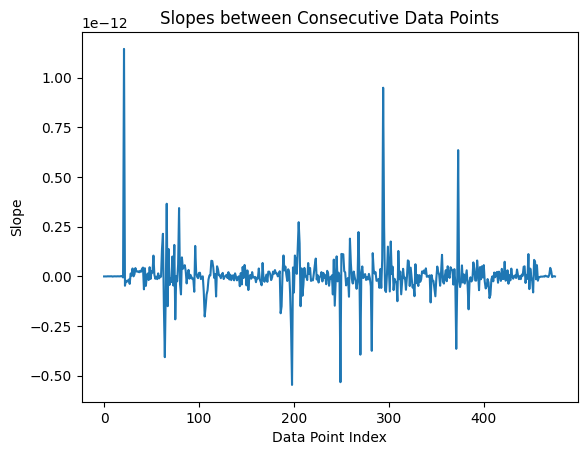

In [20]:
import matplotlib.pyplot as plt

# Plotting the list_of_slopes
plt.plot(list_of_slopes)
plt.xlabel('Data Point Index')
plt.ylabel('Slope')
plt.title('Slopes between Consecutive Data Points')
plt.show()

#**Overall: 😥**